# Grid Search XGBoost training model 

Alex Duarte (**[@leaxp](http://www.github.com/leaxp)**) - 2017

___

In [ ]:
# Load modules
import numpy as np
import pandas as pd
from __future__ import division
import seaborn as sns
sns.set(style="white", font_scale = 1.5)
sns.set_palette("muted")

import matplotlib.pyplot as plt
import itertools
import time
import os
import random

from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # resolution improve for macbook 

In [ ]:
# Define the writelog function

def writelog(file='log.txt', name ='Python notebook output', *vars ):
    ''' Function that appends cell output in a log file. 
    Usage:
        writelog('history/log_filename.txt', 'title name', 'params)
    '''
    
    localtime = '[' + time.asctime( time.localtime(time.time()) ) + ']'
    try:
        open(file, 'r')
    except:
        open(file, 'w+')
    with open(file, 'r') as f:
        with open('tmp.txt', 'w') as f2:
            f2.write('*****************************')
            f2.write('\n'+ localtime + ' - ' + name + '\n')
            for i in vars:
                f2.write('\n' + str(i) + '\n')
            f2.write('\n'+ f.read())        
    os.rename('tmp.txt', file)

In [ ]:
# Load from xgboost binary file
home = 'data/walthamstow/'
data = pd.read_csv(home + '/dataset_encoded.csv')

In [ ]:
data = data.loc[data.type==1] #  Flat
# data = data.loc[data.type==4] #  Terrace
# data = data.loc[(data.type==0) | (data.type==2) | (data.type==3)]  # Others

In [ ]:
# Set X and y
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [35]:
len(X_train), len(X_test)

(5408, 1352)

In [47]:
X_test['price'] = y_test

/home/alex/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
x='2015-01-01'
limit = (int(x[:4]) - 2000)*12 + int(x[5:7])

In [50]:
test = X_test[X_test.date >= limit]
X_test = test.drop(['price'], axis=1)
y_test = test['price']

In [58]:
len(X_test)

441

In [51]:
%%time
# XGBRegressor training model
%store -r param log_file

model = XGBRegressor(**param)
bst = model.fit(X_train, y_train, eval_metric='rmse')

# Prediction
pred = bst.predict(X_test)
label = np.array(y_test)

# Mean Error
ape = np.absolute((pred - label) / label)
mdape = np.median(ape)*100
mape = np.mean(ape)*100
print('\n Median Absolute Error - MdAPE: {:.2f}%'.format(mdape))
print('\n Mean Absolute Error - MAPE: {:.2f}%'.format(mape))
print('\n' + str(param))


 Median Absolute Error - MdAPE: 9.80%

 Mean Absolute Error - MAPE: 14.04%

{'reg_alpha': 8.114877641738266, 'n_jobs': -1, 'colsample_bytree': 0.9670528058671424, 'scale_pos_weight': 0.0014520541387750853, 'learning_rate': 0.012052966891221963, 'min_child_weight': 1.1265774065947618, 'n_estimators': 1092, 'subsample': 0.3409319144458232, 'reg_lambda': 5.35228017314987e-05, 'random_state': 23, 'objective': 'reg:linear', 'tree_method': 'auto', 'max_depth': 34, 'gamma': 9.016003141723107, 'booster': 'gbtree'}
CPU times: user 3min 37s, sys: 624 ms, total: 3min 38s
Wall time: 9.15 s


### + performance 

In [55]:
# Prediction
pred = bst.predict(X_test)
label = np.array(y_test)

In [56]:
# Median Absolute Percentage Error (MdAPE)
ape = np.absolute((pred - label) / label)
mdape = np.median(ape)*100
mape = np.mean(ape)*100
print('\n Median Absolute Error - MdAPE: {:.2f}%'.format(mdape))
print('\n Mean Absolute Error - MAPE: {:.2f}%'.format(mape))


 Median Absolute Error - MdAPE: 9.80%

 Mean Absolute Error - MAPE: 14.04%


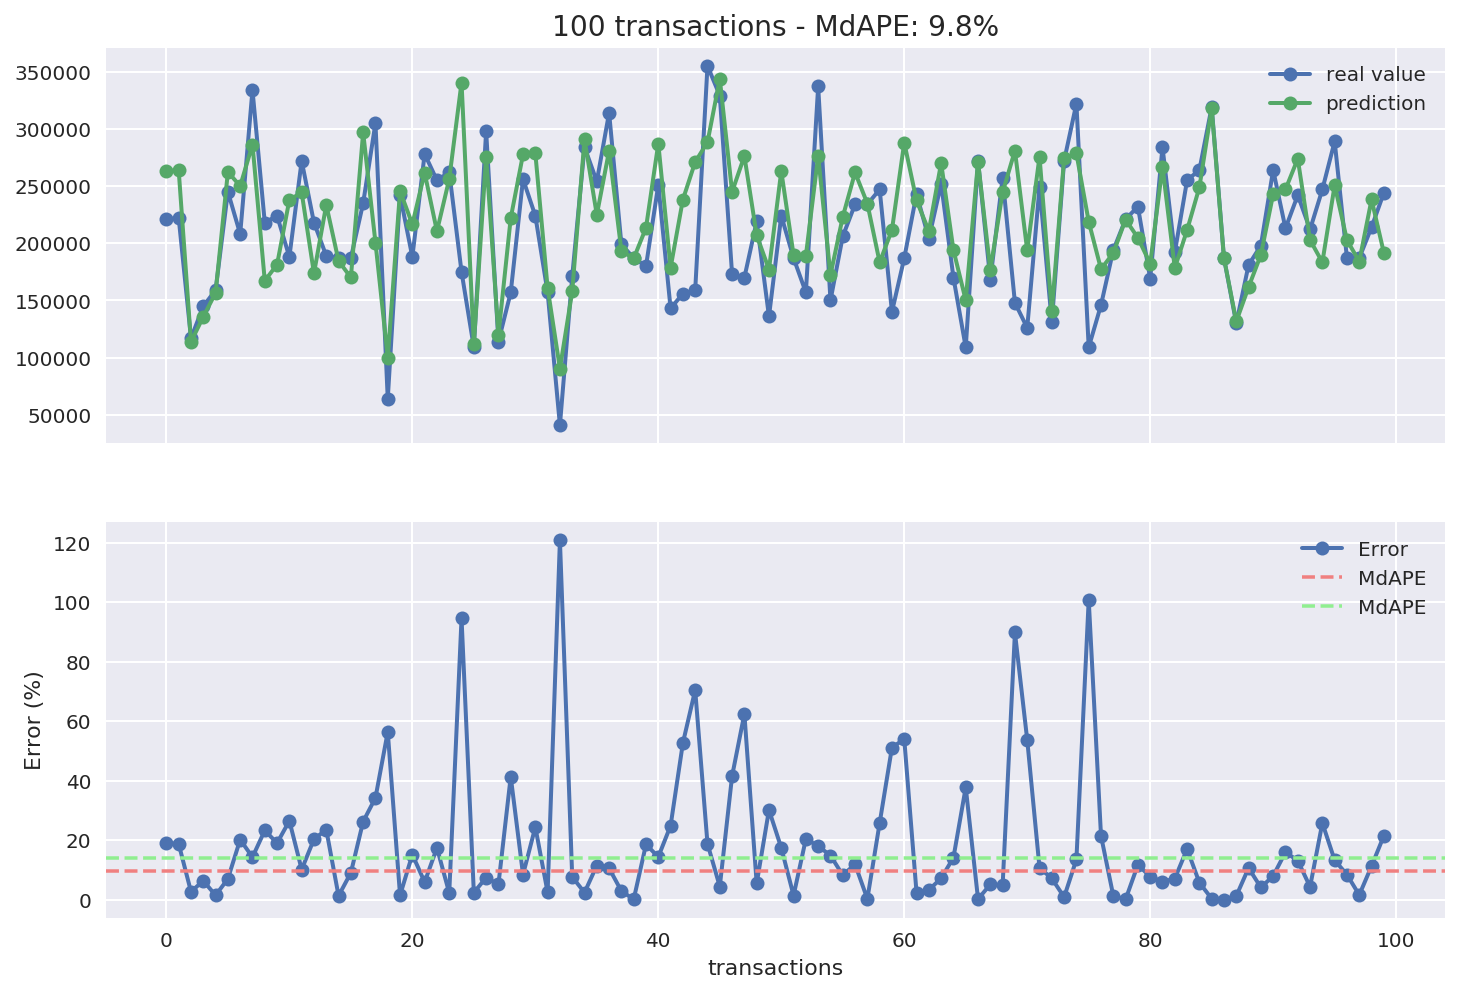

In [62]:
ape = np.absolute((pred - label) / label)*100
sns.set(style="darkgrid")
n = 100
rand = random.randint(0, len(pred))

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

# plt.xlabel("transactions")
# plt.ylabel(u"Price (£)")
x =[i for i in range(n)]

ax1.set_title(str(n) + ' transactions - MdAPE: ' + str(round(mdape, 2)) + '%', size = 14)
ax1.plot(x, label[rand:(rand + n)], marker=".", label='real value', markersize=14, lw=2);
ax1.plot(x, pred[rand:(rand + n)], marker=".", label='prediction', markersize=14, lw=2);
plt.ylabel(u"Price (£)")
ax1.legend(loc='upper right');

ax2.plot(x, ape[rand:(rand + n)], marker=".", label='Error', markersize=14, lw=2);
ax2.axhline(y=mdape, color='lightcoral', linestyle='--', label='MdAPE');
ax2.axhline(y=mape, color='lightgreen', linestyle='--', label='MdAPE');
plt.ylabel(u"Error (%)")
plt.xlabel("transactions")
ax2.legend(loc='upper right')

plt.show()

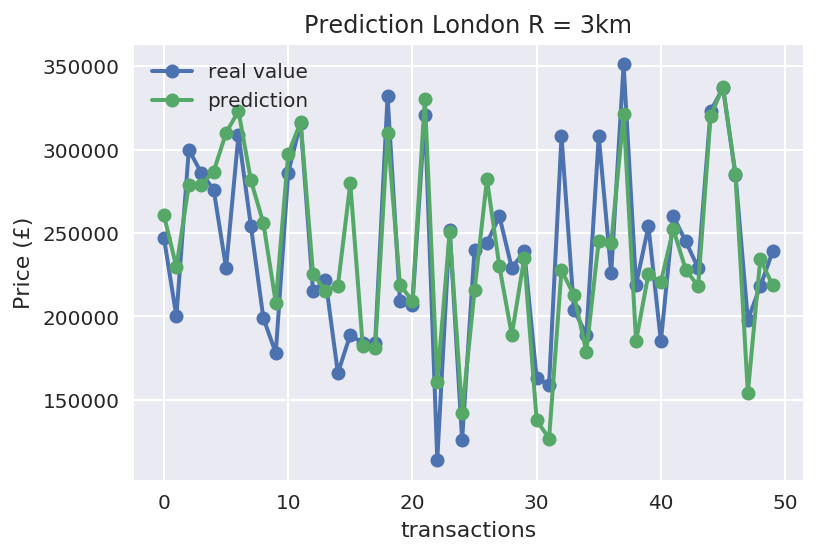

In [19]:
sns.set(style="darkgrid")
n = 50
plt.title("Prediction London R = 3km")
plt.xlabel("transactions")
plt.ylabel(u"Price (£)")
x = [i for i in range(n)]
plt.plot(x, y_test[:n], marker=".", label='real value', markersize=14, lw=2);
plt.plot(x, pred[:n], marker=".", label='prediction', markersize=14, lw=2);
plt.legend(loc='upper left');

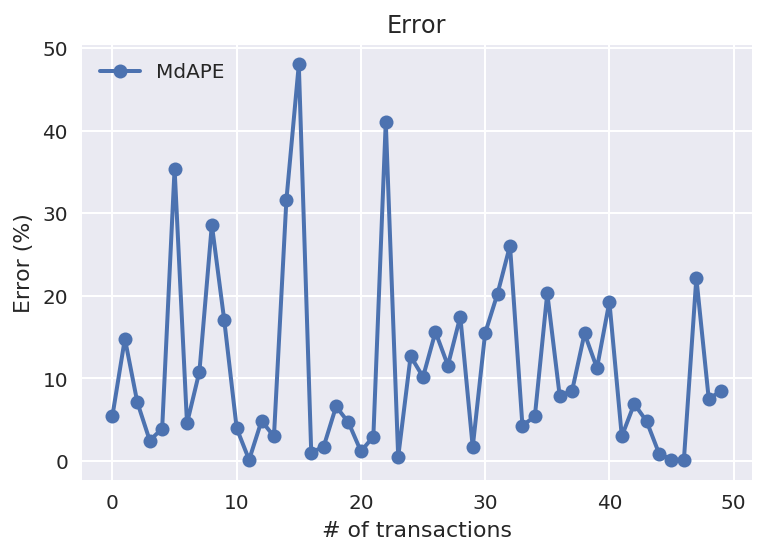

In [31]:
ape = np.absolute((pred - label) / label)*100
n =  50
sns.set(style="darkgrid")
plt.title("Error")
plt.xlabel("# of transactions")
plt.ylabel(u"Error (%)")
x = [i for i in range(n)]

plt.plot(x, ape[:n], marker=".", label='MdAPE', markersize=14, lw=2);
plt.legend(loc='upper left');